# Pytorch图像分类器

In [21]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

In [4]:
?torch.utils.data.DataLoader

In [5]:
transform = transforms.Compose(
    [transforms.ToTensor(),# PIL Image → Tensor
    transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))]  # 0,1 →  -1,1
)
trainset = torchvision.datasets.CIFAR10(download=False,root='./data',train=True,transform=transform)
# 包装 
trainloader = torch.utils.data.DataLoader(trainset,batch_size=4,shuffle=True,num_workers=2)
testset = torchvision.datasets.CIFAR10(download=False,root='./data',train=False,transform=transform)
testloader = torch.utils.data.DataLoader(testset,batch_size=4,shuffle=False,num_workers=2)

In [6]:
classes = ('plane','car','bird','cat','deer','dog','frog','horse','ship','truck')

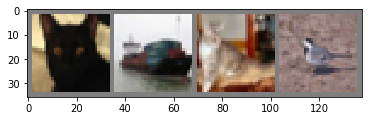

  cat  ship   cat  bird


In [8]:
import matplotlib.pyplot as plt
import numpy as np
def imshow(img):
    img = img/2+0.5 
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg,(1,2,0)))
    plt.show()
dataiter = iter(trainloader)
images,labels=dataiter.next()
imshow(torchvision.utils.make_grid(images))
print(' '.join('%5s' %classes[labels[i]] for i in range(4)))

In [10]:
?nn.MaxPool2dPool2d

In [25]:
# 定义网络 卷积神经网络
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.conv1 = nn.Conv2d(3,6,5)
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(6,16,5)
        self.fc1 = nn.Linear(16*5*5,120) #3-dim (0,1,2)
        self.fc2 = nn.Linear(120,84)
        self.fc3 = nn.Linear(84,10)
    def forward(self,x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))#
        #print(x.size()) # 4*16*5*5
        x = x.view(-1,16*5*5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
net = Net()

In [12]:
for i,data in enumerate(trainloader,0):
    images,lables = data
    if i==0:
        break

In [14]:
images.size()

torch.Size([4, 3, 32, 32])

In [16]:
self_conv1 = nn.Conv2d(3,6,5)
self_pool = nn.MaxPool2d(2,2)
self_conv2 = nn.Conv2d(6,16,5)
y = self_pool(F.relu(self_conv1(images)))
z = self_pool(F.relu(self_conv2(y)))

In [18]:
z.size()

torch.Size([4, 16, 5, 5])

In [26]:
optimizer = optim.SGD(net.parameters(),lr=0.001,momentum=0.9)
criterion = nn.CrossEntropyLoss()

In [27]:
# 训练
for epoch in range(2):
    running_loss = 0.0
    for i,data in enumerate(trainloader,0):
        images,labels = data
        optimizer.zero_grad()
        outputs = net(images)
        loss = criterion(outputs,labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i%2000 == 1999:
            print('[%d, %5d] loss:%.3f'%(epoch+1,i+1,running_loss/2000))
            running_loss = 0.0
print('Finished Traing')

[1,  2000] loss:2.287
[1,  4000] loss:1.919
[1,  6000] loss:1.702
[1,  8000] loss:1.602
[1, 10000] loss:1.536
[1, 12000] loss:1.486
[2,  2000] loss:1.422
[2,  4000] loss:1.386
[2,  6000] loss:1.377
[2,  8000] loss:1.355
[2, 10000] loss:1.334
[2, 12000] loss:1.294
Finished Traing


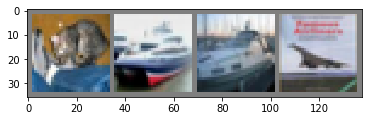

  cat  ship  ship plane


In [28]:
# 验证/评估
dataiter = iter(testloader)
images,labels=dataiter.next()
imshow(torchvision.utils.make_grid(images))
print(' '.join('%5s' %classes[labels[i]] for i in range(4)))

In [30]:
outputs = net(images)
_,predicted = torch.max(outputs,1)# torch.topk(1)
print('Predicted:'+' '.join('%5s' %classes[predicted[i]] for i in range(4)))

Predicted: frog  ship  ship  ship


In [36]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images,labels = data
        outputs = net(images)
        _,predicted = torch.max(outputs.data,1)
        total += labels.size(0)
        correct += (predicted==labels).sum().item()
print('Accuracy %d %%'%(100*correct/total))

Accuracy 51 %


In [37]:
class_correct = [0 for _ in range(10)]
class_total = [0 for _ in range(10)]
with torch.no_grad():
    for data in testloader:
        images,labels = data
        outputs = net(images)
        _,predicted = torch.max(outputs.data,1)
        c = (predicted==labels).squeeze() # 1*4 → 4
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

In [38]:
for i in range(10):
    print('Accuracy of %5s : %2d %%'%(classes[i],100*class_correct[i]/class_total[i]))

Accuracy of plane : 42 %
Accuracy of   car : 69 %
Accuracy of  bird : 18 %
Accuracy of   cat : 30 %
Accuracy of  deer : 57 %
Accuracy of   dog : 27 %
Accuracy of  frog : 80 %
Accuracy of horse : 48 %
Accuracy of  ship : 80 %
Accuracy of truck : 61 %
